# Predict if a painting purchased at auction is a fake

**One of the biggest challenges of an purchasing a painting at an auction is the risk of that the painting might have serious issues that prevent it from being sold to customers. The artist community calls these unfortunate purchases "fakes","lemons", "kicks" or "Bad Buys". Machine Learning experts who can figure out which paintings have a higher risk of being kick can provide real value to auction houses trying to provide the best inventory selection possible to their customers. This challenge is to predict if the painting purchased at the Auction is a bad buy.**

** Dataset Description:** 
* RefID:Unique (sequential) number assigned to paintings
* IsBadBuy: Identities if the kicked painting was an avoidable purchase
* PurchDate: The Date the painting was Purchased at Auction
* Auction: Auction provider at which the painting was purchased
* PaintingYear: The year of the painting
* PaintingAge: The Years elapsed since the Painting year
* Artist: painting Manufacturer
* Painting name: painting name. Each painting names may have painting categories embedded like "T1,T2,etc".
* Trim: painting Trim Level
* SubType: painting SubType
* Canvas Color: Canvas Color for painting
* Market: Market for painting (Commercial, Non-commercial)
* FrameTypeID: The type id of the painting frame
* FrameType: The painting frame type description (Wood,Metal)
* Bids: The total bids on paintings.
* Nationality: The artist's country
* Size: The size category of the painting
* TopThreeNYCName: Identities if the artist is one of the top three NYC artists.
* MMRAcquisitionAuctionAveragePrice: Acquisition price for this painting in average condition at time of purchase
* MMRAcquisitionAuctionCleanPrice: Acquisition price for this painting in the above Average condition at time of purchase
* MMRAcquisitionRetailAveragePrice: Acquisition price for this painting in the retail market in average condition at time of purchase
* MMRAcquisitonRetailCleanPrice: Acquisition price for this painting in the retail market in above average condition at time of purchase
* MMRCurrentAuctionAveragePrice: Acquisition price for this painting in average condition as of current day
* MMRCurrentAuctionCleanPrice: Acquisition price for this painting in the above condition as of current day
* MMRCurrentRetailAveragePrice: Acquisition price for this painting in the retail market in average condition as of current day
* MMRCurrentRetailCleanPrice: Acquisition price for this painting in the retail market in above average condition as of current day
* PRIMEUNIT: Identities if the painting would have a higher demand than a standard purchase
* AcquisitionType: Identities how the painting was aquired (Auction buy, trade in, etc)
* AUCGUART: The level guarantee provided by auction for the painting (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
* KickDate: Date the painting was kicked back to the auction
* BYRNO: Unique number assigned to the buyer that purchased the painting.
* VNZIP: Zipcode where the painting was purchased.
* VNST: State where the the painting was purchased.
* PaintingBCost: Acquisition cost paid for the painting at time of purchase.
* IsOnlineSale: Identities if the painting was originally purchased online.
* WarrantyCost: Warranty price (term=36month)

## 1. Initial Data Exploration

### 1a) load train dataset and split into train, criss-validation and test dataframes

In [45]:
import os
import numpy as np
import pandas as pd
import os
np.random.seed(1234)
df = pd.read_csv('~/Desktop/Github/PaintDataSet/train_dataset.csv')
train, cv, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print(train.info())
print(cv.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30652 entries, 16887 to 790
Data columns (total 34 columns):
RT13Id                               30652 non-null int64
IsBadBuy                             30652 non-null int64
PurchDate                            30652 non-null object
Auction                              30652 non-null object
PaintingYear                         30652 non-null int64
PaintingAge                          30652 non-null int64
Artist                               30652 non-null object
PaintingName                         30652 non-null object
Trim                                 29607 non-null object
SubType                              30650 non-null object
CanvasColor                          30650 non-null object
Market                               30649 non-null object
FrameTypeID                          29310 non-null float64
FrameType                            29307 non-null object
Bids                                 30652 non-null int64
National

### 1b) scatterplot for current retail clean price vs current retail avg price

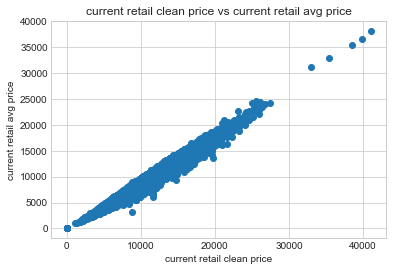

In [46]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.scatter(x=df.MMRCurrentRetailCleanPrice, y=df.MMRCurrentRetailAveragePrice, marker='o');
plt.title("current retail clean price vs current retail avg price")
plt.xlabel("current retail clean price")
plt.ylabel("current retail avg price")
plt.show()

Current retail clean price and current retail avg price have linear relationship.

### 1c) plot distributions for the painting age, bids, warranty costs, acquisitions costs, etc.

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

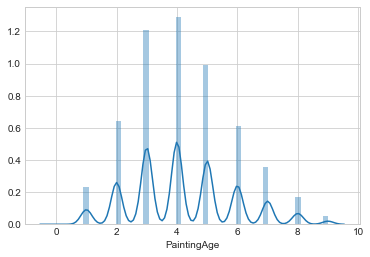

In [48]:
age = sns.distplot(df["PaintingAge"])

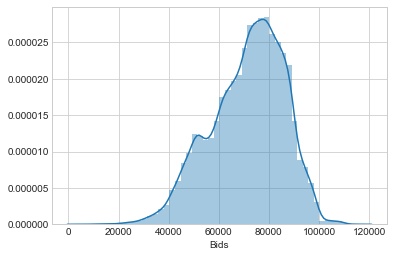

In [49]:
bids = sns.distplot(df["Bids"])

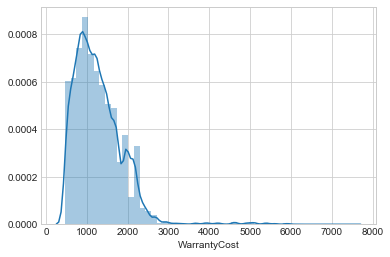

In [50]:
WarrantyCost = sns.distplot(df["WarrantyCost"])

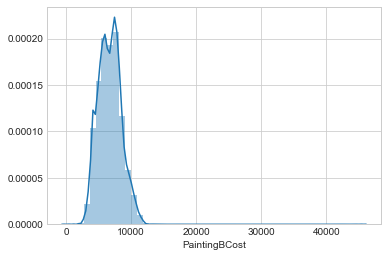

In [51]:
PaintingBCost = sns.distplot(df["PaintingBCost"])

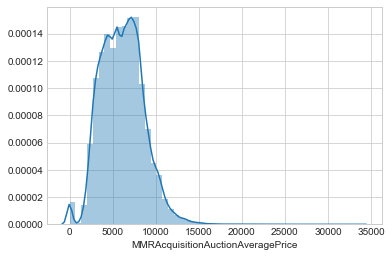

In [52]:
df = df.dropna(subset=['MMRAcquisitionAuctionAveragePrice'])
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(int)
MMRAcquisitionAuctionAveragePrice = sns.distplot(df["MMRAcquisitionAuctionAveragePrice"])

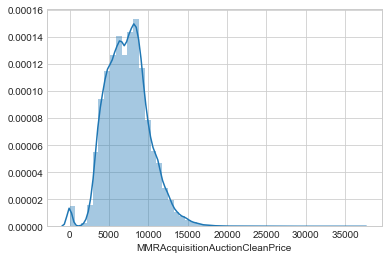

In [53]:
df = df.dropna(subset=['MMRAcquisitionAuctionCleanPrice'])
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].astype(int)
MMRAcquisitionAuctionCleanPrice = sns.distplot(df["MMRAcquisitionAuctionCleanPrice"])

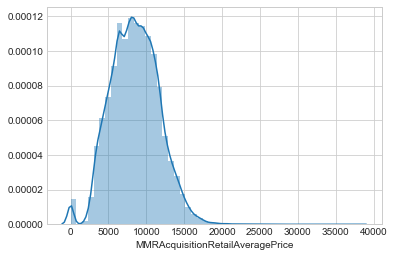

In [54]:
df = df.dropna(subset=['MMRAcquisitionRetailAveragePrice'])
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].astype(int)
MMRAcquisitionRetailAveragePrice = sns.distplot(df["MMRAcquisitionRetailAveragePrice"])

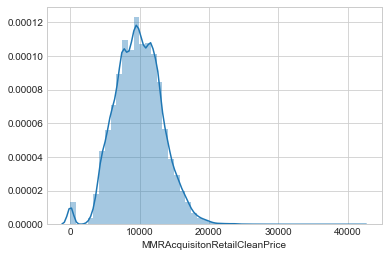

In [55]:
df = df.dropna(subset=['MMRAcquisitonRetailCleanPrice'])
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].astype(int)
MMRAcquisitonRetailCleanPrice = sns.distplot(df["MMRAcquisitonRetailCleanPrice"])

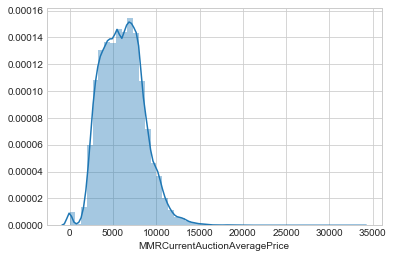

In [56]:
df = df.dropna(subset=['MMRCurrentAuctionAveragePrice'])
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(int)
MMRCurrentAuctionAveragePrice = sns.distplot(df["MMRCurrentAuctionAveragePrice"])

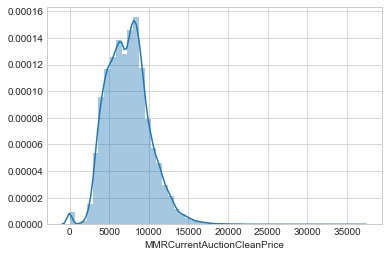

In [57]:
df = df.dropna(subset=['MMRCurrentAuctionCleanPrice'])
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].astype(int)
MMRCurrentAuctionCleanPrice = sns.distplot(df["MMRCurrentAuctionCleanPrice"])

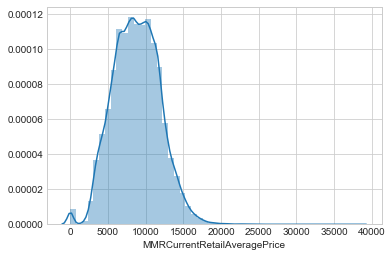

In [58]:
df = df.dropna(subset=['MMRCurrentRetailAveragePrice'])
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].astype(int)
MMRCurrentRetailAveragePrice = sns.distplot(df["MMRCurrentRetailAveragePrice"])

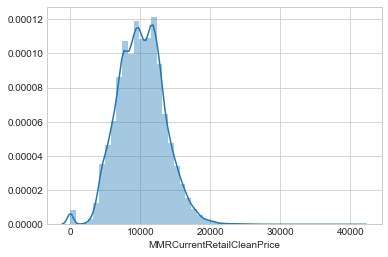

In [59]:
df = df.dropna(subset=['MMRCurrentRetailCleanPrice'])
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].astype(int)
MMRCurrentRetailCleanPrice = sns.distplot(df["MMRCurrentRetailCleanPrice"])

## 2. Feature Engineering

### 2a) Drop ID variable

In [60]:
df.drop(['RT13Id'],axis=1,inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50866 entries, 0 to 51087
Data columns (total 33 columns):
IsBadBuy                             50866 non-null int64
PurchDate                            50866 non-null object
Auction                              50866 non-null object
PaintingYear                         50866 non-null int64
PaintingAge                          50866 non-null int64
Artist                               50866 non-null object
PaintingName                         50866 non-null object
Trim                                 49175 non-null object
SubType                              50862 non-null object
CanvasColor                          50862 non-null object
Market                               50861 non-null object
FrameTypeID                          48627 non-null float64
FrameType                            48623 non-null object
Bids                                 50866 non-null int64
Nationality                          50865 non-null object
Size     

### 2b) Extract the painting categories T1-T13 from Painting Name and subtype. Create new columns for above extracted categories with 1 or 0 as outcome values.


In [61]:
import re
def get_paintingcat(str1,str2):
    r=re.compile(r".*\s(T+\d{1,2}).*")
    if str1!= str1 or str2!= str2:
        return 0
    if r.match(str1):
        return r.match(str1).group(1)
    elif r.match(str2):
        return r.match(str2).group(1)
    else:
        return 0
df['PaintingCategories'] = df.apply(lambda x: get_paintingcat(x.PaintingName,x.SubType), axis=1)
df['PaintingCategories'].value_counts()   
# df1=df[['PaintingName','PaintingCategories']]
# df1

0      15116
T6     14119
T7      7324
T11     2954
T5      2415
T13     2261
T2      2073
T10     1630
T8      1362
T4       762
T1       392
T12      236
T3       166
T9        56
Name: PaintingCategories, dtype: int64

### 2c) The dataset describes the number of quality checks. to extract this use Painting Name. Each check is described three ways I4,I-4,I4 and I6,I-6,I 6.

In [62]:
df['QualityChecks'] = df['PaintingName'].str.extract('(I\S[4,6]|I[4,6]|I\s[4,6])').fillna(value=0)
df['QualityChecks'].value_counts()

/Users/shirleyzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0      43889
I4      6298
I-4      567
I6        96
I 4       10
I-6        6
Name: QualityChecks, dtype: int64

### 2d) Painting size is also encoded in painting name and subtype. For example 3.5L . Extract that using grep function.

In [63]:
import re
def get_paintingsize(str1,str2):
    r=re.compile(r".*\s(.*\dL).*")
    if str1!= str1 or str2!= str2:
        return 0
    if r.match(str1):
        return r.match(str1).group(1)
    elif r.match(str2):
        return r.match(str2).group(1)
    else:
        return 0
df['PaintingSize'] = df.apply(lambda x: get_paintingsize(x.PaintingName,x.SubType), axis=1)
df['PaintingSize'] = df['PaintingSize'].replace('4-FI-2.0L', value=0)
df['PaintingSize'] = df['PaintingSize'].replace('/3.3L', value=0)
df['PaintingSize'].value_counts()   

0       22589
3.5L     3485
2.4L     2696
3.0L     2357
2.2L     2193
2.0L     1916
4.2L     1759
2.7L     1715
3.3L     1714
3.8L     1626
4.7L     1318
3.4L     1138
3.9L      803
3.7L      683
4.0L      663
4.6L      660
5.3L      557
5.4L      443
2.3L      442
5.7L      436
1.6L      279
4.8L      257
4.3L      223
2.5L      210
3.1L      183
1.8L      136
5.6L      103
2.8L       73
5.9L       57
1.9L       41
6.0L       27
1.5L       23
1L         23
3.2L       13
3.6L       10
1.7L        9
2.9L        3
5.2L        1
4.5L        1
6.2L        1
Name: PaintingSize, dtype: int64

### 2e) Sub Type contains categories of the painting. Genre, History, Still Life, Real Life, Landscape, Portrait and Fine Art. Extract this information.

In [64]:
df['PaintingCategories'] = df['SubType'].str.extract('(Genre|History|Still\sLife|Real\sLife|Landscape|Portrait|Fine\sArt)').fillna(value=0)
df['PaintingCategories'].value_counts()

/Users/shirleyzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Genre         29643
0             12424
History        2858
Portrait       2300
Landscape      1782
Fine Art        906
Still Life      859
Real Life        94
Name: PaintingCategories, dtype: int64

### 2f) Calculate ratio for prices and bids as part of feature engineering.

In [65]:
df['MMRAcquisitionAuctionAveragePriceRatio'] = df['MMRAcquisitionAuctionAveragePrice']/df['Bids']
df['MMRAcquisitionAuctionCleanPriceRatio'] = df['MMRAcquisitionAuctionCleanPrice']/df['Bids']  
df['MMRAcquisitionRetailAveragePriceRatio'] = df['MMRAcquisitionRetailAveragePrice']/df['Bids']  
df['MMRAcquisitonRetailCleanPriceRatio'] = df['MMRAcquisitonRetailCleanPrice']/df['Bids']  
df['MMRCurrentAuctionAveragePriceRatio'] = df['MMRCurrentAuctionAveragePrice']/df['Bids']  
df['MMRCurrentAuctionCleanPriceRatio'] = df['MMRCurrentAuctionCleanPrice']/df['Bids']  
df['MMRCurrentRetailAveragePriceRatio'] = df['MMRCurrentRetailAveragePrice']/df['Bids']  
df['MMRCurrentRetailCleanPriceRatio'] = df['MMRCurrentRetailCleanPrice']/df['Bids']  

### 2g) Compute dummmies for factors (Artist, painting Year, CanvasColor,etc). For example convert categorical variables to dummy indicator variables.

In [66]:
df_Artist = pd.get_dummies(df['Artist'])
df_Auction = pd.get_dummies(df['Auction'])
df_PaintingName = pd.get_dummies(df['PaintingName'])
df_Trim = pd.get_dummies(df['Trim'])
df_PaintingName = pd.get_dummies(df['PaintingName'])
df_SubType = pd.get_dummies(df['SubType'])
df_CanvasColor = pd.get_dummies(df['CanvasColor'])
df_Market = pd.get_dummies(df['Market'])
df_CanvasColor = pd.get_dummies(df['CanvasColor'])
df_FrameType = pd.get_dummies(df['FrameType'])
df_Nationality = pd.get_dummies(df['Nationality'])
df_Size = pd.get_dummies(df['Size'])
df_TopThreeNYCName = pd.get_dummies(df['TopThreeNYCName'])
df_PRIMEUNIT = pd.get_dummies(df['PRIMEUNIT'])
df_AUCGUART = pd.get_dummies(df['AUCGUART'])
df_VNST = pd.get_dummies(df['VNST'])


## 3. Additional Feature Engineering

### 3a) Separating day, month, year from purchase date.

In [67]:
df['Year']=[d.split('/')[2] for d in df.PurchDate]
df['Year']=df['Year'].astype(str).astype(int)
df['Month']=[d.split('/')[0] for d in df.PurchDate]
df['Month']=df['Month'].astype(str).astype(int)
df['Day']=[d.split('/')[1] for d in df.PurchDate]
df['Day']=df['Day'].astype(str).astype(int)
df.head(5)

,IsBadBuy,PurchDate,Auction,PaintingYear,PaintingAge,Artist,PaintingName,Trim,SubType,CanvasColor,...,MMRAcquisitionAuctionCleanPriceRatio,MMRAcquisitionRetailAveragePriceRatio,MMRAcquisitonRetailCleanPriceRatio,MMRCurrentAuctionAveragePriceRatio,MMRCurrentAuctionCleanPriceRatio,MMRCurrentRetailAveragePriceRatio,MMRCurrentRetailCleanPriceRatio,Year,Month,Day
0,0,4/21/10,Christie's,2007,3,Cai Jin,TUCSON T2 T7,GLS,4D other,SILVER,...,0.133509,0.161039,0.178479,0.123383,0.139510,0.170540,0.186918,10,4,21
1,0,4/1/09,Sotheby's,2004,5,Grandma Moses,Moses T6 3.9L T6 E,Bas,2D Landscape,SILVER,...,0.083150,0.078104,0.095922,0.063752,0.079072,0.074969,0.091526,9,4,1
2,0,3/31/10,Christie's,2008,2,Frida Kahlo,AURA T6,XE,4D Genre XE,SILVER,...,0.140196,0.166423,0.180902,0.121459,0.139062,0.164788,0.194174,10,3,31
3,1,6/16/10,Sotheby's,2003,7,Leonardo Da Vinci,MALIBU T6,Bas,4D Genre,GOLD,...,0.042761,0.069075,0.081433,0.029862,0.043045,0.067631,0.084374,10,6,16
4,0,11/4/10,Sotheby's,2007,3,Leonardo Da Vinci,COBALT,LS,4D Genre LS,RED,...,0.109989,0.145541,0.165504,0.083274,0.099614,0.140635,0.158958,10,11,4


### 3b) Fit model 

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50866 entries, 0 to 51087
Data columns (total 47 columns):
IsBadBuy                                  50866 non-null int64
PurchDate                                 50866 non-null object
Auction                                   50866 non-null object
PaintingYear                              50866 non-null int64
PaintingAge                               50866 non-null int64
Artist                                    50866 non-null object
PaintingName                              50866 non-null object
Trim                                      49175 non-null object
SubType                                   50862 non-null object
CanvasColor                               50862 non-null object
Market                                    50861 non-null object
FrameTypeID                               48627 non-null float64
FrameType                                 48623 non-null object
Bids                                      50866 non-null int6

### 3c) Check each feature's effect on IsBadBuy

#### Check NA

In [69]:
df.isnull().any()

IsBadBuy                                  False
PurchDate                                 False
Auction                                   False
PaintingYear                              False
PaintingAge                               False
Artist                                    False
PaintingName                              False
Trim                                       True
SubType                                    True
CanvasColor                                True
Market                                     True
FrameTypeID                                True
FrameType                                  True
Bids                                      False
Nationality                                True
Size                                       True
TopThreeNYCName                            True
MMRAcquisitionAuctionAveragePrice         False
MMRAcquisitionAuctionCleanPrice           False
MMRAcquisitionRetailAveragePrice          False
MMRAcquisitonRetailCleanPrice           

#### Auction

In [70]:
print(df[['Auction', 'IsBadBuy']].groupby(['Auction'], as_index=False).mean())
print("Before", df['Auction'].unique())
df['Auction'].unique()
title_auction = {"Christie's": 1,"Sotheby's": 2, "OTHER": 3}
df['Auction'] = df['Auction'].map(title_auction)
print("After", df['Auction'].unique())

      Auction  IsBadBuy
0  Christie's  0.114197
1       OTHER  0.119918
2   Sotheby's  0.152854
Before ["Christie's" "Sotheby's" 'OTHER']
After [1 2 3]


#### Painting Year

In [71]:
print (df[['PaintingYear', 'IsBadBuy']].groupby(['PaintingYear'], as_index=False).mean())

   PaintingYear  IsBadBuy
0          2001  0.285300
1          2002  0.243367
2          2003  0.195189
3          2004  0.152283
4          2005  0.131601
5          2006  0.093377
6          2007  0.077713
7          2008  0.058649
8          2009  0.042781
9          2010  0.000000


In [72]:
#Drop painting yeat since it's correlated with painting age.
drop_column = ['PaintingYear']
df.drop(drop_column, axis=1, inplace = True)

#### Painting Age

In [73]:
print (df[['PaintingAge', 'IsBadBuy']].groupby(['PaintingAge'], as_index=False).mean())

   PaintingAge  IsBadBuy
0            0  0.000000
1            1  0.041646
2            2  0.065901
3            3  0.081142
4            4  0.111572
5            5  0.142009
6            6  0.180466
7            7  0.215573
8            8  0.270701
9            9  0.320000


#### Artist

In [74]:
print (df[['Artist', 'IsBadBuy']].groupby(['Artist'], as_index=False).mean())
print('Before', df['Artist'].unique())
#map artist name
artist_name = {"Cai Jin": 1, "Grandma Moses": 2, "Frida Kahlo": 3, "Leonardo Da Vinci": 4,
                 "Michelangelo": 5, "Qu Ding": 6, "Pablo Picasso": 7, "Buick": 8, "Andy Warhol": 9,
       "Raphael": 10, "Jean-Michel BasquiatC": 11, "Cheng": 12, "Boticelli": 13,
       "Michael Judd": 14, "Vincent Van Gogh": 15, "Paul Klee": 16, "Giovanni": 17,
       "Jan Van Eyck": 18, "Titian": 18, "Jackson Pollock": 19, "Bronzio": 20, "Vin": 21,
       "M F Hussain": 22, "Lincoln": 23, "Claude Monet": 24, "Giotto": 25, "Mini": 26,
       "El Grecko": 27, "Sohel": 28, "Caravaggio": 29, "Paul": 30, "Tintorretto": 31}
df['Artist'] = df['Artist'].map(artist_name)
print('After', df['Artist'].unique())

                   Artist  IsBadBuy
0             Andy Warhol  0.130734
1               Boticelli  0.088889
2                 Bronzio  0.204545
3                   Buick  0.169261
4                 Cai Jin  0.127676
5              Caravaggio  0.350000
6                   Cheng  0.146652
7            Claude Monet  0.192308
8               El Grecko  0.296296
9             Frida Kahlo  0.142950
10                 Giotto  0.363636
11               Giovanni  0.151184
12          Grandma Moses  0.154832
13        Jackson Pollock  0.168712
14           Jan Van Eyck  0.115942
15  Jean-Michel BasquiatC  0.125813
16      Leonardo Da Vinci  0.097587
17                Lincoln  0.287879
18            M F Hussain  0.000000
19           Michael Judd  0.085502
20           Michelangelo  0.156836
21                   Mini  0.368421
22          Pablo Picasso  0.102283
23                   Paul  0.000000
24              Paul Klee  0.128713
25                Qu Ding  0.118775
26                Raphael  0

#### Painting Name

In [75]:
print (df[['PaintingName', 'IsBadBuy']].groupby(['PaintingName'], as_index=False).mean())
#Drop painting name since it's messy.
drop_column = ['PaintingName']
df.drop(drop_column, axis=1, inplace = True)

                 PaintingName  IsBadBuy
0       1500 RAM Real Life T1  0.121951
1       1500 RAM Real Life T2  0.098168
2     1500 SIERRA Real Life 2  0.093750
3     1500 SIERRA Real Life 4  0.000000
4        1500 SILVERADO PICKU  0.096244
5        1500HD SILVERADO PIC  0.000000
6       2500 RAM Real Life T1  0.000000
7       2500 RAM Real Life T2  0.200000
8        2500 SILVERADO PICKU  0.000000
9     2500HD SIERRA Real Life  0.000000
10       2500HD SILVERADO PIC  0.428571
11                     3.2 CL  0.000000
12       3.2 CL 3.2L V 6 NA S  0.500000
13                     3.2 TL  0.166667
14       3.2 TL 3.2L T6 FI DO  1.000000
15        3.2 TL 3.2L T6 T13I  0.400000
16                        300  0.094972
17            300 2.7L T6 T10  0.059322
18        300 3.5L / 6.0L V12  0.000000
19            300 3.5L T6 T10  0.000000
20       300 3.5L T6 T10 / SM  0.117647
21                       300C  0.333333
22      300C 5.7L T5 T11I / S  1.000000
23                       300M  0.222222


#### Trim

In [76]:
print (df[['Trim', 'IsBadBuy']].groupby(['Trim'], as_index=False).mean())
#Drop trim name since there are too little value.
drop_column = ['Trim']
df.drop(drop_column, axis=1, inplace = True)

    Trim  IsBadBuy
0      1  0.075000
1    150  0.146226
2      2  0.156648
3    250  0.000000
4      3  0.123188
5    3 R  0.000000
6    Adv  0.100000
7    Bas  0.122708
8      C  0.500000
9     CE  0.091463
10    CX  0.125786
11   CXL  0.118421
12   CXS  0.000000
13   Car  0.333333
14   Cin  0.333333
15   Cla  0.130699
16   Cus  0.191781
17    DE  0.000000
18    DS  0.000000
19    DX  0.277778
20   Den  0.500000
21   Dur  0.500000
22    ES  0.131213
23    EX  0.122691
24   EX-  0.000000
25   Edd  0.164557
26   Edg  0.151515
27   Ent  0.000000
28   Exe  0.333333
29   FX4  0.333333
..   ...       ...
101  Spy  0.307692
102  Sta  0.117647
103   T5  0.000000
104  Tou  0.135135
105  Ult  0.000000
106   VP  0.210526
107  Val  0.117647
108  W/T  0.102564
109    X  0.111111
110   XE  0.078571
111   XL  0.139159
112  XLS  0.229730
113  XLT  0.190939
114   XR  0.000000
115  XRS  0.000000
116   XS  0.500000
117  Z24  1.000000
118  Z71  0.114286
119  ZR2  0.333333
120  ZTS  0.255319
121  ZTW  0.

#### SubType

In [77]:
print (df[['SubType', 'IsBadBuy']].groupby(['SubType'], as_index=False).mean())
#Drop SubType since there are too little value.
drop_column = ['SubType']
df.drop(drop_column, axis=1, inplace = True)

                                      SubType  IsBadBuy
0                       2D Fine Art 2.3L EDGE  0.000000
1                         2D Fine Art 2.3L XL  0.000000
2                            2D Fine Art 3.0L  0.000000
3                 2D Fine Art 3.0L DUAL SPORT  0.000000
4             2D Fine Art 3.0L DUAL SPORT FFV  0.000000
5                       2D Fine Art 3.0L EDGE  0.250000
6                         2D Fine Art 3.0L SE  0.000000
7                         2D Fine Art 3.0L XL  0.000000
8                        2D Fine Art 3.0L XLT  0.666667
9                       2D Fine Art 4.0L EDGE  0.000000
10                                   2D Genre  0.000000
11                                2D Genre GX  0.000000
12                         2D HARTOP other GT  0.000000
13                               2D HATCHBACK  0.217391
14                            2D HATCHBACK GS  0.000000
15                           2D HATCHBACK ZX3  0.166667
16                        2D HATCKBACK SI 5SP  0

#### CanvasColor

In [78]:
print (df[['CanvasColor', 'IsBadBuy']].groupby(['CanvasColor'], as_index=False).mean())
#fill NA
df['CanvasColor'].fillna("NOT AVAIL",inplace = True)
print(df["CanvasColor"].unique())

#Mapping
print("Before", df.shape)
print("Before", df["CanvasColor"].unique())
title_canvascolor = {"SILVER":1, "GOLD":2, "RED":3, "GREY":4, "GREEN":5, "BLACK":6, "BLUE":7, "WHITE":8,
       "PURPLE":9, "MAROON":10, "OTHER":11, "ORANGE":12, "BEIGE":13, "BROWN":14,
       "NOT AVAIL":15, "YELLOW":16}
df["CanvasColor"] = df["CanvasColor"].map(title_canvascolor)
print("After", df["CanvasColor"].unique())
print("After", df.shape)

   CanvasColor  IsBadBuy
0        BEIGE  0.132806
1        BLACK  0.117869
2         BLUE  0.115611
3        BROWN  0.116883
4         GOLD  0.141478
5        GREEN  0.127698
6         GREY  0.115065
7       MAROON  0.134737
8    NOT AVAIL  0.241935
9       ORANGE  0.080420
10       OTHER  0.135802
11      PURPLE  0.126394
12         RED  0.129941
13      SILVER  0.122914
14       WHITE  0.123737
15      YELLOW  0.112500
['SILVER' 'GOLD' 'RED' 'GREY' 'GREEN' 'BLACK' 'BLUE' 'WHITE' 'PURPLE'
 'MAROON' 'OTHER' 'ORANGE' 'BEIGE' 'BROWN' 'NOT AVAIL' 'YELLOW']
Before (50866, 43)
Before ['SILVER' 'GOLD' 'RED' 'GREY' 'GREEN' 'BLACK' 'BLUE' 'WHITE' 'PURPLE'
 'MAROON' 'OTHER' 'ORANGE' 'BEIGE' 'BROWN' 'NOT AVAIL' 'YELLOW']
After [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
After (50866, 43)


#### Market

In [79]:
print (df[['Market', 'IsBadBuy']].groupby(['Market'], as_index=False).mean())
#Fill NA
df['Market'].fillna(df['Market'].mode()[0], inplace = True)
print(df["Market"].unique())

#mapping


           Market  IsBadBuy
0      Commercial  0.123548
1  Non Commercial  0.114809
['Commercial' 'Non Commercial']


In [80]:
title_canvascolor = {"Commercial":1, "Non Commercial":2}
df["Market"] = df["Market"].map(title_canvascolor)
print("After", df["Market"].unique())


After [1 2]


#### FrameTypeID

In [81]:
print (df[['FrameTypeID', 'IsBadBuy']].groupby(['FrameTypeID'], as_index=False).mean())
#fill na
df['FrameTypeID'].fillna(df['FrameTypeID'].mode()[0], inplace = True)
print(df["FrameTypeID"].unique())

#drop frame type
#drop_column = ['FrameType']
#df.drop(drop_column, axis=1, inplace = True)

   FrameTypeID  IsBadBuy
0          0.0  0.000000
1          1.0  0.108536
2          2.0  0.081480
3          3.0  0.118421
[ 1.  2.  3.  0.]


#### Bids

In [82]:
print (df[['Bids', 'IsBadBuy']].groupby(['Bids'], as_index=False).mean())
#categorize bids into 10 range
bids_avg = df['Bids'].mean()
Bids_std = df['Bids'].std()  
df['Bids'] = df['Bids'].astype(int)   
df['CategoricalBids'] = pd.cut(df['Bids'], 5)
print (df[['CategoricalBids', 'IsBadBuy']].groupby(['CategoricalBids'], as_index=False).mean())
# mapping 
# df.loc[(df['CategoricalBids'] > 4714.108) &(df['CategoricalBids'] <= 27003.4), 'CategoricalBids'] = 1
# df.loc[(df['CategoricalBids'] > 27003.4) & (df['CategoricalBids'] <= 49181.8), 'CategoricalBids'] = 2
# df.loc[(df['CategoricalBids'] > 49181.8) & (df['CategoricalBids'] <= 71360.2), 'CategoricalBids'] = 3
# df.loc[(df['CategoricalBids'] > 71360.2) & (df['CategoricalBids'] <= 93538.6), 'CategoricalBids'] = 4
# df.loc[(df['CategoricalBids'] > 93538.6) & (df['CategoricalBids'] <= 115717.0),'CategoricalBids'] = 5
# print("After", df["CategoricalBids"].unique())

         Bids  IsBadBuy
0        4825       1.0
1        5368       0.0
2        9446       1.0
3        9878       0.0
4       10095       1.0
5       10643       0.0
6       11662       1.0
7       12628       0.0
8       12926       0.0
9       13445       1.0
10      13924       1.0
11      14187       0.0
12      14474       0.0
13      14519       0.0
14      14547       0.0
15      14961       1.0
16      15249       0.0
17      15409       1.0
18      15655       0.0
19      15743       1.0
20      15894       0.0
21      16713       0.0
22      16833       0.0
23      17281       0.0
24      17538       0.0
25      18923       0.0
26      19070       0.0
27      19200       0.0
28      19430       0.0
29      19534       0.0
...       ...       ...
32570  108811       0.0
32571  108831       0.0
32572  108910       1.0
32573  109018       0.0
32574  109025       0.0
32575  109060       0.0
32576  109133       0.0
32577  109151       0.0
32578  109217       0.0
32579  109300   

#### Nationality

In [83]:
print (df[['Nationality', 'IsBadBuy']].groupby(['Nationality'], as_index=False).mean())
#fill NA
df['Nationality'].fillna("OTHER", inplace = True)
print(df["Nationality"].unique())


      Nationality  IsBadBuy
0        AMERICAN  0.121467
1           OTHER  0.137931
2     OTHER ASIAN  0.133239
3  TOP LINE ASIAN  0.129344
['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER']


In [84]:
#mapping
nationality = {"OTHER ASIAN":1, "AMERICAN":2, "TOP LINE ASIAN":3, "OTHER":4}
df["Nationality"] = df["Nationality"].map(nationality)
print("After", df["Nationality"].unique())

After [1 2 3 4]


#### Size

In [85]:
print (df[['Size', 'IsBadBuy']].groupby(['Size'], as_index=False).mean())
print(df["Size"].unique())
#fill na
df['Size'].fillna(df['Size'].mode()[0], inplace = True)
print(df["Size"].unique())

            Size  IsBadBuy
0        COMPACT  0.158836
1      CROSSOVER  0.101954
2       Enlarged  0.127849
3          LARGE  0.090894
4   LARGE Canvas  0.109297
5    LARGE other  0.158841
6         MEDIUM  0.116092
7   MEDIUM other  0.149956
8   SMALL Canvas  0.136752
9    SMALL other  0.138834
10     SPECIALTY  0.089219
11        Shrink  0.192101
['SMALL other' 'Shrink' 'MEDIUM' 'COMPACT' 'MEDIUM other' 'Enlarged'
 'LARGE' 'CROSSOVER' 'LARGE Canvas' 'SPECIALTY' 'SMALL Canvas'
 'LARGE other' nan]
['SMALL other' 'Shrink' 'MEDIUM' 'COMPACT' 'MEDIUM other' 'Enlarged'
 'LARGE' 'CROSSOVER' 'LARGE Canvas' 'SPECIALTY' 'SMALL Canvas'
 'LARGE other']


In [86]:
#mapping
size = {"SMALL other":1, "Shrink":2, "MEDIUM":3, "COMPACT":4, "MEDIUM other":5, "Enlarged":6,
 "LARGE":7, "CROSSOVER":8, "LARGE Canvas":9, "SPECIALTY":10, "SMALL Canvas":11,
 "LARGE other":12}
df["Size"] = df["Size"].map(size)
print("After", df["Size"].unique())

After [ 1  2  3  4  5  6  7  8  9 10 11 12]


#### TopThreeNYCName

In [87]:
print (df[['TopThreeNYCName', 'IsBadBuy']].groupby(['TopThreeNYCName'], as_index=False).mean())
print(df["TopThreeNYCName"].unique())

        TopThreeNYCName  IsBadBuy
0           Andy Warhol  0.116349
1         Grandma Moses  0.156925
2  Jean-Michel Basquiat  0.109097
3                 OTHER  0.132120
['OTHER' 'Grandma Moses' 'Jean-Michel Basquiat' 'Andy Warhol' nan]


In [88]:
#fill na
df['TopThreeNYCName'].fillna("OTHER", inplace = True)
print(df["TopThreeNYCName"].unique())

['OTHER' 'Grandma Moses' 'Jean-Michel Basquiat' 'Andy Warhol']


In [89]:
#mapping
size = {"OTHER":1, "Grandma Moses":2, "Jean-Michel Basquiat":3, "Andy Warhol":4}
df["TopThreeNYCName"] = df["TopThreeNYCName"].map(size)
print("After", df["TopThreeNYCName"].unique())

After [1 2 3 4]


#### PRIMEUNIT

In [90]:
#fill na
df['PRIMEUNIT'].fillna("OTHER", inplace = True)
print(df["PRIMEUNIT"].unique())
print (df[['PRIMEUNIT', 'IsBadBuy']].groupby(['PRIMEUNIT'], as_index=False).mean())
print(df["PRIMEUNIT"].unique())
#mapping
cat = {"OTHER":1, "NO":2, "YES":3}
df["PRIMEUNIT"] = df["PRIMEUNIT"].map(cat)
print("After", df["PRIMEUNIT"].unique())

['OTHER' 'NO' 'YES']
  PRIMEUNIT  IsBadBuy
0        NO  0.037259
1     OTHER  0.127369
2       YES  0.119048
['OTHER' 'NO' 'YES']
After [1 2 3]


#### AUCGUART

In [91]:
#fill na
df['AUCGUART'].fillna("OTHER", inplace = True)
print(df["AUCGUART"].unique())
print (df[['AUCGUART', 'IsBadBuy']].groupby(['AUCGUART'], as_index=False).mean())
print(df["AUCGUART"].unique())
#mapping
COLOR = {"OTHER":1, "GREEN":2, "RED":3}
df["AUCGUART"] = df["AUCGUART"].map(COLOR)
print("After", df["AUCGUART"].unique())

['OTHER' 'GREEN' 'RED']
  AUCGUART  IsBadBuy
0    GREEN  0.037005
1    OTHER  0.127369
2      RED  0.113208
['OTHER' 'GREEN' 'RED']
After [1 2 3]


#### BYRNO

In [92]:
print (df[['BYRNO', 'IsBadBuy']].groupby(['BYRNO'], as_index=False).mean())
print(df["BYRNO"].unique())
# df = df.dropna(subset=['BYRNO'])
# df['BYRNO'] = df['BYRNO'].astype(int)
# BYRNO = sns.distplot(df["BYRNO"])

    BYRNO  IsBadBuy
0     835  0.121680
1    1031  0.050000
2    1035  0.000000
3    1041  0.142857
4    1045  0.166667
5    1051  0.056604
6    1055  0.000000
7    1081  0.066667
8    1082  0.000000
9    1085  0.205128
10   1086  0.000000
11   1121  0.166667
12   1125  0.000000
13   1141  0.066667
14   1151  0.043478
15   1152  0.250000
16   1156  0.000000
17   1191  0.135135
18   1231  0.154412
19   1235  0.089783
20   3453  0.119425
21   3582  1.000000
22   5546  0.097276
23   8172  0.118029
24   8655  0.132249
25  10310  0.181818
26  10315  0.102362
27  10410  0.000000
28  10420  0.000000
29  10425  0.000000
..    ...       ...
41  18880  0.149088
42  18881  0.092105
43  19064  0.132404
44  19619  0.120375
45  19638  0.108880
46  19662  0.126654
47  20207  0.122693
48  20234  0.100068
49  20392  0.180723
50  20740  0.155213
51  20833  0.173759
52  20928  0.096810
53  21047  0.166667
54  21053  0.134585
55  21973  0.120489
56  22808  0.139876
57  22916  0.135714
58  23359  0.168385


#### Prices

In [93]:
#Fill NA
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

#### Zipcode & State

In [94]:
#USE VNST
print (df[['VNST', 'IsBadBuy']].groupby(['VNST'], as_index=False).mean())
print(df["VNST"].unique())

   VNST  IsBadBuy
0    AL  0.137014
1    AR  0.218182
2    AZ  0.111525
3    CA  0.132308
4    CO  0.123482
5    FL  0.109851
6    GA  0.104590
7    IA  0.148876
8    ID  0.118881
9    IL  0.149502
10   IN  0.142045
11   KY  0.073620
12   LA  0.141079
13   MA  0.166667
14   MD  0.144785
15   MI  0.100000
16   MN  0.057143
17   MO  0.115672
18   MS  0.096317
19   NC  0.117130
20   NE  0.066667
21   NH  0.089552
22   NJ  0.120000
23   NM  0.109756
24   NV  0.162500
25   NY  0.000000
26   OH  0.078853
27   OK  0.095879
28   OR  0.064286
29   PA  0.168285
30   SC  0.143288
31   TN  0.107605
32   TX  0.136292
33   UT  0.123311
34   VA  0.155788
35   WA  0.076923
36   WV  0.108911
['TX' 'LA' 'FL' 'AZ' 'CO' 'VA' 'OK' 'GA' 'UT' 'SC' 'NC' 'CA' 'TN' 'IN' 'NE'
 'MO' 'IL' 'MD' 'PA' 'NH' 'NV' 'NJ' 'AL' 'IA' 'NM' 'OH' 'WV' 'OR' 'ID' 'MS'
 'KY' 'WA' 'MN' 'NY' 'AR' 'MA' 'MI']


In [95]:
#mapping
st = {"TX":1, "LA":2, "FL":3, "AZ":4, "CO":5, "VA":6, "OK":7, "GA":8, "UT":9, "SC":10, "NC":11, "CA":12, "TN":13, "IN":14, "NE":15,
 "MO":16, "IL":17, "MD":18, "PA":19, "NH":20, "NV":21, "NJ":22, "AL":23, "IA":24, "NM":25, "OH":26, "WV":27, "OR":28, "ID":29, "MS":30,
 "KY":31, "WA":32, "MN":33, "NY":34, "AR":35, "MA":36, "MI":37}
df["VNST"] = df["VNST"].map(st)
print("After", df["VNST"].unique())

After [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37]


#### PaintingCategories, QualityChecks,PaintingSize         

In [96]:
print (df[["PaintingCategories", "IsBadBuy"]].groupby(["PaintingCategories"], as_index=False).mean())
print(df["PaintingCategories"].unique())
#mapping
cat = {0:0, "Landscape":1, "Genre":2, "Portrait":3, "Real Life":4, "Still Life":5, "Fine Art":6, "History":7}
df["PaintingCategories"] = df["PaintingCategories"].map(cat)
print("After", df["PaintingCategories"].unique())

  PaintingCategories  IsBadBuy
0                  0  0.135866
1           Fine Art  0.121413
2              Genre  0.115879
3            History  0.120364
4          Landscape  0.164983
5           Portrait  0.125217
6          Real Life  0.117021
7         Still Life  0.114086
[0 'Landscape' 'Genre' 'Portrait' 'Real Life' 'Still Life' 'Fine Art'
 'History']
After [0 1 2 3 4 5 6 7]


In [97]:
print (df[["QualityChecks", "IsBadBuy"]].groupby(["QualityChecks"], as_index=False).mean())
print(df["QualityChecks"].unique())
#mapping
cat = {0:0, "I4":1, "I-4":2, "I6":3, "I 4":4, "I-6":5}
df["QualityChecks"] = df["QualityChecks"].map(cat)
print("After", df["QualityChecks"].unique())

  QualityChecks  IsBadBuy
0             0  0.124131
1           I 4  0.300000
2           I-4  0.153439
3           I-6  0.333333
4            I4  0.114481
5            I6  0.072917
[0 'I4' 'I-4' 'I6' 'I 4' 'I-6']
After [0 1 2 3 4 5]


In [98]:
print (df[["PaintingSize", "IsBadBuy"]].groupby(["PaintingSize"], as_index=False).mean())
print(df["PaintingSize"].unique())
#mapping
cat = {0:0, "3.9L":3, "4.2L":4, "2.0L":2, "3.3L":3, "3.5L":3, "3.0L":3, "4.0L":4, "2.4L":2, "5.3L":5, "2.2L":2,
 "4.7L":4, "3.7L":3, "3.4L":3, "5.4L":5, "3.8L":3, "2.7L":2, "1.8L":1, "5.7L":5, "4.8L":4, "2.3L":2,
 "4.6L":4, "2.5L":2, "2.8L":2, "5.6L":5, "1.6L":1, "3.1L":3, "5.9L":5, "4.3L":4, "6.0L":6, "1.9L":1,
 "3.6L":3, "1.5L":1, "1L":1, "1.7L":1, "2.9L":2, "4.5L":4, "3.2L":3, "6.2L":6, "5.2L":5}
df["PaintingSize"] = df["PaintingSize"].map(cat)
print("After", df["PaintingSize"].unique())

   PaintingSize  IsBadBuy
0             0  0.129930
1          1.5L  0.086957
2          1.6L  0.172043
3          1.7L  0.000000
4          1.8L  0.117647
5          1.9L  0.170732
6            1L  0.043478
7          2.0L  0.129958
8          2.2L  0.100319
9          2.3L  0.106335
10         2.4L  0.118694
11         2.5L  0.152381
12         2.7L  0.071720
13         2.8L  0.054795
14         2.9L  0.000000
15         3.0L  0.141281
16         3.1L  0.267760
17         3.2L  0.307692
18         3.3L  0.113186
19         3.4L  0.154657
20         3.5L  0.070301
21         3.6L  0.100000
22         3.7L  0.108346
23         3.8L  0.137761
24         3.9L  0.103362
25         4.0L  0.224736
26         4.2L  0.119386
27         4.3L  0.121076
28         4.5L  0.000000
29         4.6L  0.174242
30         4.7L  0.106980
31         4.8L  0.081712
32         5.2L  0.000000
33         5.3L  0.118492
34         5.4L  0.221219
35         5.6L  0.067961
36         5.7L  0.064220
37         5

In [99]:
#drop zipcode
drop_column = ['PurchDate','FrameType']
df.drop(drop_column, axis=1, inplace = True)

In [100]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50866 entries, 0 to 51087
Data columns (total 42 columns):
IsBadBuy                                  50866 non-null int64
Auction                                   50866 non-null int64
PaintingAge                               50866 non-null int64
Artist                                    50866 non-null int64
CanvasColor                               50866 non-null int64
Market                                    50866 non-null int64
FrameTypeID                               50866 non-null float64
Bids                                      50866 non-null int64
Nationality                               50866 non-null int64
Size                                      50866 non-null int64
TopThreeNYCName                           50866 non-null int64
MMRAcquisitionAuctionAveragePrice         50866 non-null int64
MMRAcquisitionAuctionCleanPrice           50866 non-null int64
MMRAcquisitionRetailAveragePrice          50866 non-null int64
MMRAcqu

In [101]:
#drop CategoricalBids!!!
drop_column = ['CategoricalBids']
df.drop(drop_column, axis=1, inplace = True)

## 4. Fit Model

In [102]:
#print (df.info())
#train, test = np.split(df.sample(frac=1), [int(.8*len(df))])
#print(train.info())
#print(cv.info())
#print(test.info())
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.8
train = df[msk]
test = df[~msk]
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40757 entries, 1 to 51087
Data columns (total 42 columns):
IsBadBuy                                  40757 non-null int64
Auction                                   40757 non-null int64
PaintingAge                               40757 non-null int64
Artist                                    40757 non-null int64
CanvasColor                               40757 non-null int64
Market                                    40757 non-null int64
FrameTypeID                               40757 non-null float64
Bids                                      40757 non-null int64
Nationality                               40757 non-null int64
Size                                      40757 non-null int64
TopThreeNYCName                           40757 non-null int64
MMRAcquisitionAuctionAveragePrice         40757 non-null int64
MMRAcquisitionAuctionCleanPrice           40757 non-null int64
MMRAcquisitionRetailAveragePrice          40757 non-null int64
MMRAcqu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

## Separate train dataset and test dataset
test.drop(labels=["IsBadBuy"],axis = 1,inplace=True)

## Separate train features and label 
train["IsBadBuy"] = train["IsBadBuy"].astype(int)
Y_train = train["IsBadBuy"]
X_train = train.drop(labels = ["IsBadBuy"],axis = 1)

kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

#cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
#"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

cv_res = pd.loc({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


### Try use SVC, AdaBoost, RandomForest, ExtraTrees and GradientBoosting

In [ ]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

In [ ]:
gsadaDTC.best_score_

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

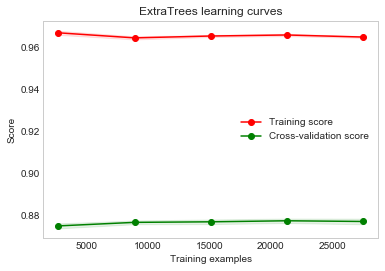

In [76]:
import numpy as np
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)

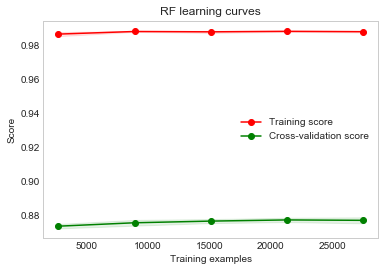

In [77]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)